In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
target_size = (224, 224)
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/images/train', # مجلد التدريب
    target_size=target_size,
    batch_size=12,
    shuffle=False ,
    class_mode='categorical'
)
validation_generator = data_generator.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/images/val',
    target_size=target_size,
    batch_size=4,
    shuffle=False ,
    class_mode='categorical'
)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
from keras.applications import Xception
resnet_weights_path = '/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model=Xception(include_top=False, pooling='avg', weights=resnet_weights_path)


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]

In [ ]:
len(base_model.layers)

133

In [ ]:
base_model.trainable=False

In [ ]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 20865578 (79.60 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(
    x=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
6/6 [==============================] - 32s 5s/step - loss: 0.7647 - accuracy: 0.3333 - val_loss: 0.6541 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 21s 3s/step - loss: 0.6335 - accuracy: 0.6111 - val_loss: 0.5684 - val_accuracy: 0.5500
Epoch 3/20
6/6 [==============================] - 21s 4s/step - loss: 0.5004 - accuracy: 0.8611 - val_loss: 0.4734 - val_accuracy: 0.9000
Epoch 4/20
6/6 [==============================] - 20s 4s/step - loss: 0.4160 - accuracy: 0.9444 - val_loss: 0.4006 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 20s 3s/step - loss: 0.3560 - accuracy: 0.9444 - val_loss: 0.3436 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 21s 4s/step - loss: 0.3160 - accuracy: 0.9861 - val_loss: 0.2984 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 21s 4s/step - loss: 0.2673 - accuracy: 0.9861 - val_loss: 0.2629 - val_accuracy: 1.0000
Epoch 8/20
6/6 [==================

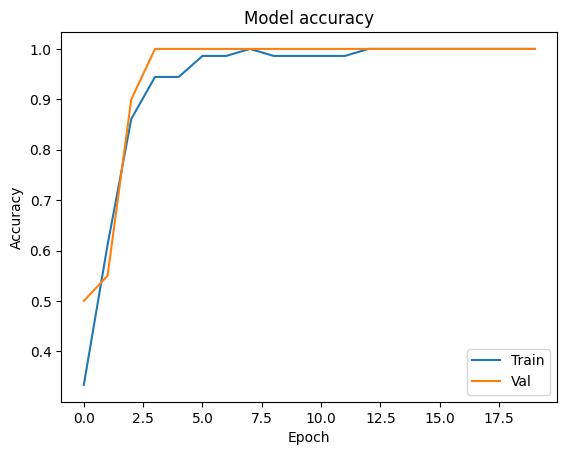

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
validation_generator.reset()
score = model.evaluate(validation_generator, steps=len(validation_generator))
print('Test accuracy:', round(score[1]*100, 2))

5/5 [==============================] - 6s 993ms/step - loss: 0.0994 - accuracy: 1.0000
Test accuracy: 100.0


In [ ]:
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred

5/5 [==============================] - 5s 846ms/step


array([[9.8554707e-01, 1.4452973e-02],
       [9.8448956e-01, 1.5510499e-02],
       [9.2358309e-01, 7.6416925e-02],
       [9.9807799e-01, 1.9219824e-03],
       [9.8841095e-01, 1.1589068e-02],
       [9.9870121e-01, 1.2987445e-03],
       [9.7789633e-01, 2.2103649e-02],
       [9.9583459e-01, 4.1653635e-03],
       [9.3374580e-01, 6.6254243e-02],
       [9.9598110e-01, 4.0189512e-03],
       [2.1397267e-03, 9.9786025e-01],
       [5.1588546e-03, 9.9484116e-01],
       [6.7712800e-03, 9.9322867e-01],
       [1.0486667e-02, 9.8951334e-01],
       [1.3164675e-02, 9.8683524e-01],
       [8.8572074e-03, 9.9114275e-01],
       [1.9324498e-02, 9.8067552e-01],
       [5.7185739e-03, 9.9428141e-01],
       [5.0023763e-04, 9.9949980e-01],
       [1.4415949e-03, 9.9855846e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
validation_generator.class_indices

{'rural': 0, 'urban': 1}

In [ ]:
class_labels = [class_name for class_name in validation_generator.class_indices.keys()]
class_labels

['rural', 'urban']

In [ ]:
y_true = validation_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[10,  0],
       [ 0, 10]])

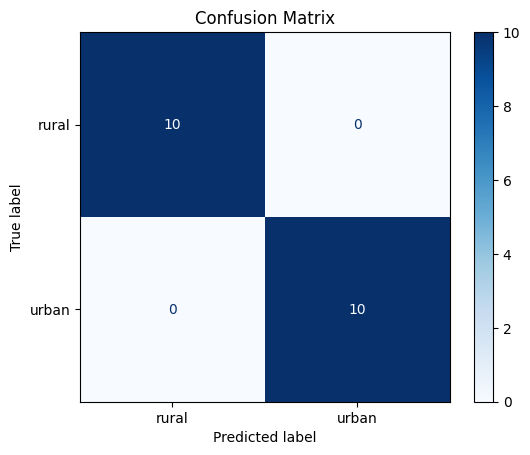

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/models/class_urban_rural_model.keras")

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/models/class_urban_rural_model.keras")

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 20865578 (79.60 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

img_path = '/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/images/val/rural/rural10.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_arr_proc = preprocess_input(img_array)


In [ ]:
prediction = loaded_model.predict(img_arr_proc)
prediction

1/1 [==============================] - 1s 978ms/step


array([[0.98448956, 0.01551049]], dtype=float32)

In [ ]:
class_index = np.argmax(prediction, axis=1)
class_index

array([0])

In [ ]:
class_labels = ['rural', 'urban']
predicted_class_label = class_labels[class_index[0]]
predicted_class_label

'rural'

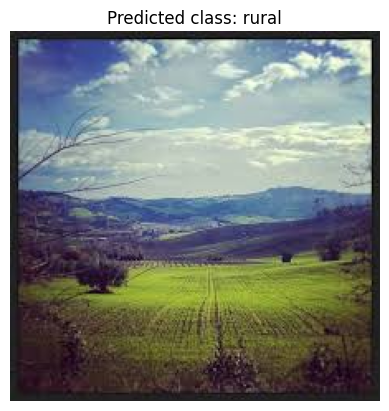

In [ ]:
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_arr_proc = preprocess_input(img_array)
    return img, img_arr_proc

Some Urban Images: 


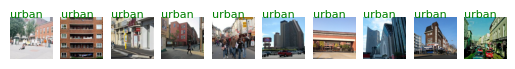

In [ ]:
import os
class_labels = ['rural', 'urban']

folder_path_urban = "/content/drive/MyDrive/Colab Notebooks/Hasoup/L3/images/val/urban"

jpeg_files_urban = [f for f in os.listdir(folder_path_urban) if f.endswith(".jpeg") or f.endswith(".jpg")]

num_photos_to_display = 10
true_class="urban"
print("Some Urban Images: ")
for i, jpeg_file in enumerate(jpeg_files_urban[:num_photos_to_display]):
    img_path = os.path.join(folder_path_urban, jpeg_file)
    img, img_array = load_and_preprocess_image(img_path)
    prediction = loaded_model.predict(img_array ,verbose=0)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(img)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)
    plt.axis("off")

plt.show()


Some Rural Images: 


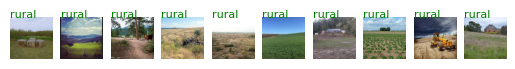

In [ ]:
folder_path_rural = "images\\val\\rural"

jpeg_files_rural = [f for f in os.listdir(folder_path_rural) if f.endswith(".jpeg") or f.endswith(".jpg")]

true_class="rural"
print("Some Rural Images: ")
for i, jpeg_file in enumerate(jpeg_files_rural[:num_photos_to_display]):
    img_path = os.path.join(folder_path_rural, jpeg_file)
    img, img_array = load_and_preprocess_image(img_path)
    prediction = loaded_model.predict(img_array,verbose=0)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(img)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)
    plt.axis("off")